In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# KNN Class

In [2]:
class KNN:
    def __init__(self, k=5, dist='eucledian'):
        self.k = k
    
    def sim_eucledian(self, x1, x2):
        return np.sqrt(((x1-x2)**2).sum(axis=1))
    
    def fit(self, x_train, y_train):
        self.xtr = x_train
        self.ytr = y_train
    
    def predict(self, x_test):
        preds = []
        for ix in range(x_test.shape[0]):
            dist = self.sim_eucledian(self.xtr, x_test[ix])
            dist = np.array([[dist[i], self.ytr[i]] for i in range(dist.shape[0])])
            k_neighbours = np.array(sorted(dist, key=lambda x:x[0])[:self.k])
            labels = k_neighbours[:, -1]
            freq = np.unique(labels, return_counts=True)
            preds.append(freq[0][freq[1].argmax()])
        return np.array(preds)
    
    def accuracy(self, x_test, y_true):
        preds = self.predict(x_test)
        y_true = np.array(y_true)
        accuracy = ((preds == y_true).sum()) / y_true.shape[0]
        return accuracy

## Testing KNN Class

In [3]:
mean_01 = np.array([1,1])
cov_01 = np.array([[5.9, 2.4], [2.7, 1.5]])

mean_02 = np.array([4, 5])
cov_02 = np.array([[2, -0.1], [0.1, 1.5]])

data_01 = np.random.multivariate_normal(mean_01, cov_01, 500)
data_02 = np.random.multivariate_normal(mean_02, cov_02, 500)

all_data = np.zeros((1000, 3))

all_data[:500, :2] = data_01
all_data[500:, :2] = data_02

all_data[500:, -1] = 1

np.random.shuffle(all_data)

split = int(0.8 * all_data.shape[0])
train = all_data[:split]
test = all_data[split:]

features_train, labels_train = train[:, :2], train[:, -1]
features_test, labels_test = test[:, :2], test[:, -1]

knn = KNN()
knn.fit(features_train, labels_train)
preds = knn.predict(features_test)
acc = knn.accuracy(features_test, labels_test)

In [4]:

preds

array([ 0.,  1.,  0.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,  1.,  1.,  1.,
        1.,  1.,  0.,  1.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,
        1.,  0.,  0.,  0.,  1.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,  1.,
        1.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  1.,  1.,  0.,  1.,
        1.,  0.,  1.,  1.,  0.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,  0.,
        1.,  0.,  1.,  0.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,
        1.,  1.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  0.,
        0.,  1.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  1.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,
        0.,  1.,  1.,  1.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,
        1.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  1.,  1.,  1.,
        0.,  0.,  1.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,
        1.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0

In [5]:
acc

0.93500000000000005

In [6]:
labels_test==preds

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True, False,
       False,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True, False,
        True,  True,

## Using KNN to predict Handwritten Digits
Data set used - [MNIST Dataset on kaggle](https://www.kaggle.com/c/digit-recognizer)

In [7]:
def extract_data(file, train_data=True):
    df = pd.read_csv(file, index_col=False)
    if train_data:
        labels_train = df['label'].as_matrix()
        features_train = df.as_matrix()[:, 1:]
        return features_train, labels_train
    else:
        features_test = df.as_matrix()
        return features_test

In [9]:
features_train, labels_train = extract_data('train.csv')
features_test = extract_data('test.csv', train_data=False)


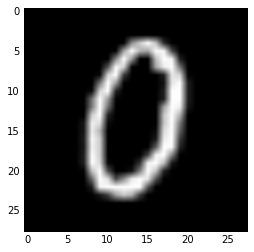

In [11]:
plt.figure(0)
# matplotlib assumes that images are RGB so use cmap='gray'
# to remove interpolation use interpolation=None
plt.imshow(features_train[5, :].reshape(28,28), cmap='gray', interpolation=None)
plt.show()

In [ ]:
knn = KNN(k=7)
knn.fit(features_train, labels_train)

In [ ]:
preds = knn.predict(features_test)

In [ ]:
result_dict = {
    "ImageId": [i for i in range(1, len(preds)+1)],
    "label": preds.astype(int)
}
result_df = pd.DataFrame(result_dict, )
result_df.to_csv("result.csv", index=False)

In [ ]:
# accuracy for k=7 => 0.96700